In [2]:
import pandas as pd

In [5]:
df=pd.read_csv('data/gee.csv')

In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [9]:
df=df.drop(['Unnamed: 0.1','Unnamed: 0','id'],axis=1)

In [10]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   x        50000 non-null  float64
 7   y        50000 non-null  float64
 8   z        50000 non-null  float64
 9   price    50000 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [13]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [14]:
df.duplicated().sum()

0

In [17]:
categorical_columns=df.columns[df.dtypes=='O']
numerical_columns=df.columns[df.dtypes!='O']

In [19]:
df[categorical_columns].describe()

,cut,color,clarity
count,50000,50000,50000
unique,5,7,8
top,Ideal,G,SI1
freq,23978,11487,13693


In [20]:
df[numerical_columns].describe()

,carat,depth,table,x,y,z,price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.792736,61.817020,57.223782,5.718485,5.723354,3.535904,3995.116720
std,0.465689,1.089746,1.926185,1.115352,1.108474,0.689622,4065.434661
min,0.200000,52.100000,49.000000,3.770000,3.720000,0.000000,326.000000
25%,0.390000,61.300000,56.000000,4.690000,4.700000,2.900000,945.000000
50%,0.700000,61.900000,57.000000,5.710000,5.720000,3.530000,2423.000000
75%,1.030000,62.400000,58.000000,6.520000,6.520000,4.030000,5457.250000
max,3.400000,69.900000,70.000000,9.430000,10.010000,8.180000,18818.000000


In [22]:
df['color'].value_counts()

color
G    11487
E     9186
F     8874
H     7997
D     6254
I     4542
J     1660
Name: count, dtype: int64

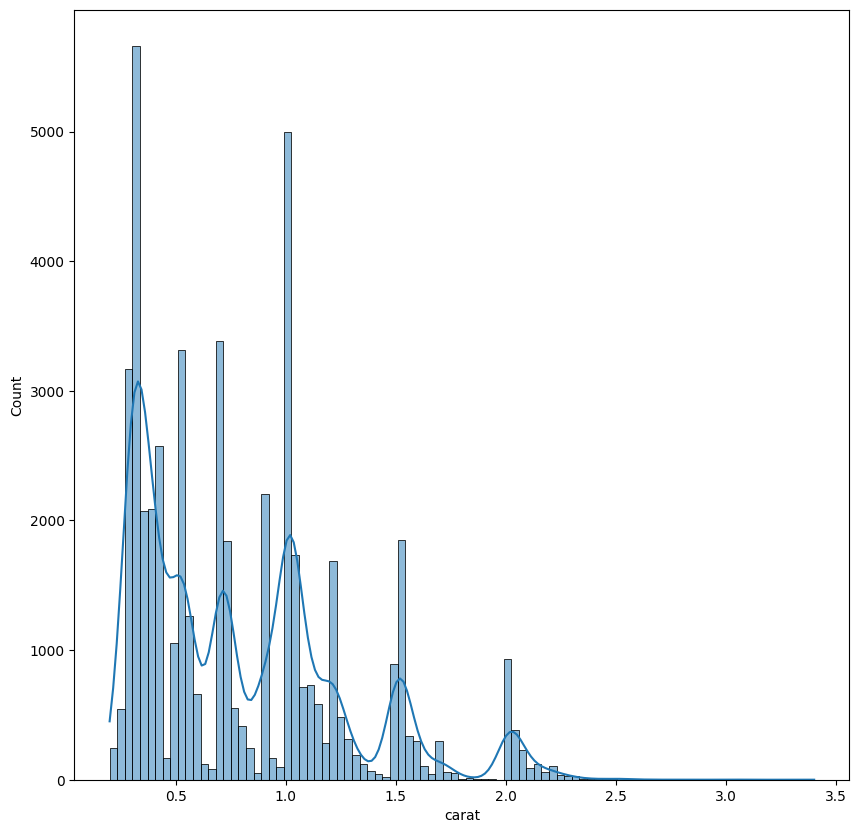

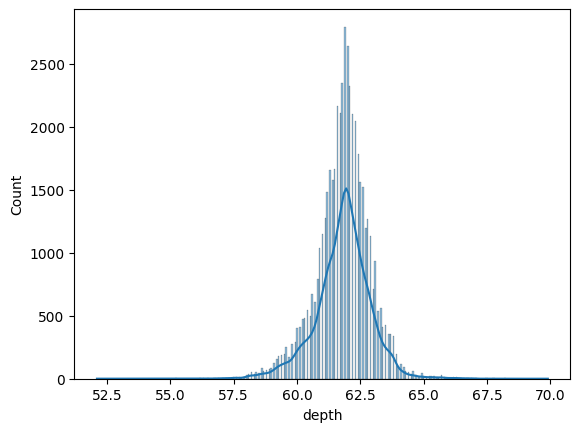

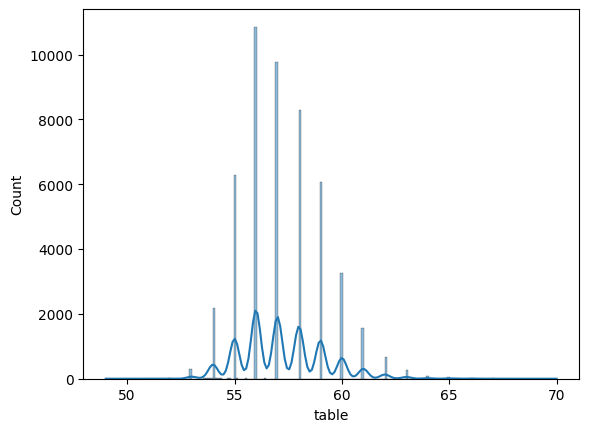

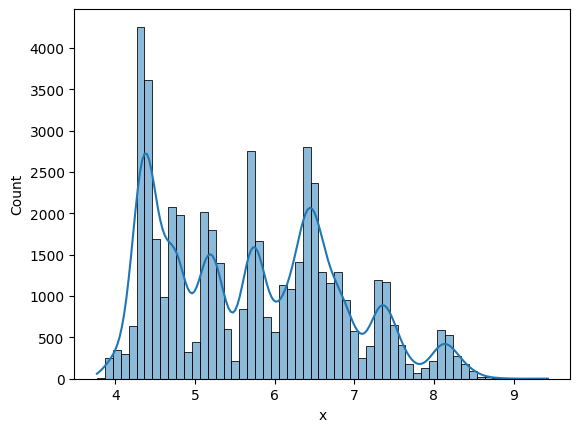

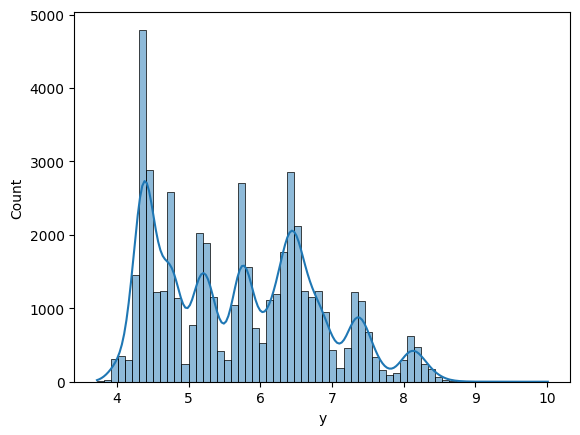

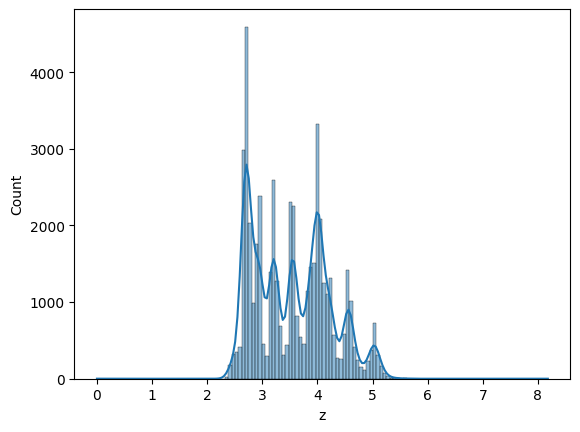

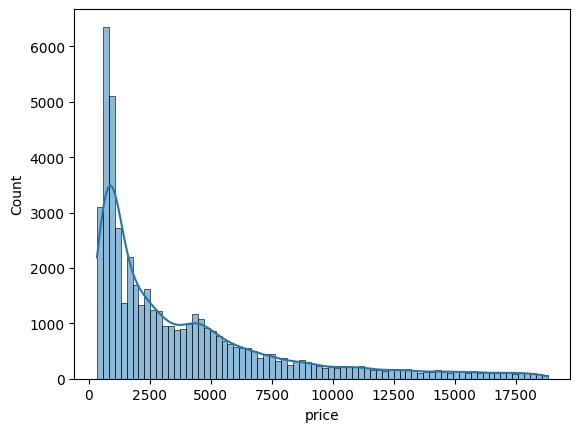

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [27]:
sns.heatmap(df.corr())

ValueError: could not convert string to float: 'Premium'

In [28]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [29]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [30]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [31]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [32]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [33]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [34]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [37]:
df['cut']=df['cut'].map(cut_map)
df['clarity']=df['clarity'].map(clarity_map)
df['color']=df['color'].map(color_map)

In [38]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,NaN,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,NaN,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,NaN,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,NaN,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,NaN,4,4,62.6,59.0,7.65,7.61,4.77,14453
